In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_boston
data=load_boston()
df=pd.DataFrame(data=data.data,columns=data.feature_names)
target=pd.DataFrame(data=data.target)

In [3]:
df['target']=target

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.shape

(506, 14)

In [6]:
data=df

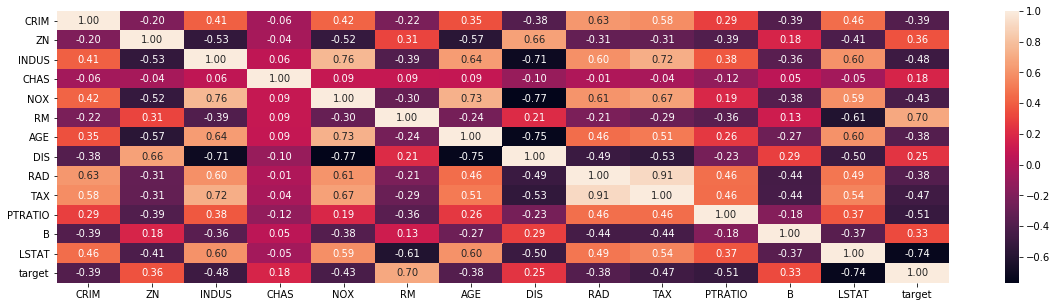

In [7]:
plt.figure(figsize=(20,5))
sns.heatmap(data.corr(),annot=True,fmt='0.0002f')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.734    
Dependent Variable: target           AIC:                3025.6086
Date:               2020-09-15 17:54 BIC:                3084.7801
No. Observations:   506              Log-Likelihood:     -1498.8  
Df Model:           13               F-statistic:        108.1    
Df Residuals:       492              Prob (F-statistic): 6.72e-135
R-squared:          0.741            Scale:              22.518   
-------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
const       36.4595    5.1035    7.1441  0.0000   26.4322   46.4868
CRIM        -0.1080    0.0329   -3.2865  0.0011   -0.1726   -0.0434
ZN           0.0464    0.0137    3.3816  0.0008    0.0194    0.0734
INDUS        0.0206    0.0615    0.3343  0.7383   -0.1003    0.1414
CHAS         2.6867    0.8616    3.1184  0.0019    0.9939    4.3796
NOX        -17.7666    3.8197   -4.6513  0.0000  -25.2716  -10.2616
RM           3.8099    0.4179    9.1161  0.0000    2.9887    4.6310
AGE          0.0007    0.0132    0.0524  0.9582   -0.0253    0.0266
DIS         -1.4756    0.1995   -7.3980  0.0000   -1.8675   -1.0837
RAD          0.3060    0.0663    4.6129  0.0000    0.1757    0.4364
TAX         -0.0123    0.0038   -3.2800  0.0011   -0.0197   -0.0049
PTRATIO     -0.9527    0.1308   -7.2825  0.0000   -1.2098   -0.6957
B            0.0093    0.0027    3.4668  0.0006    0.0040    0.0146
LSTAT       -0.5248    0.0507  -10.3471  0.0000   -0.6244   -0.4251
------------------------------------------------------------------
Omnibus:             178.041       Durbin-Watson:          1.078  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       783.126
Skew:                1.521         Prob(JB):               0.000  
Kurtosis:            8.281         Condition No.:          15114  
==================================================================
* The condition number is large (2e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [10]:
## "INDU" and "AGE" Have High P value so we are dropping them

In [11]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
df.drop(['INDUS','AGE'],axis=1,inplace=True)

In [13]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.25,random_state=0)

In [15]:
import xgboost
XGBR=xgboost.XGBRegressor()
XGBR=XGBR.fit(train_x,train_y)
y_pred_test=XGBR.predict(test_x)

In [43]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(test_y,y_pred_test))
print(mean_absolute_error(test_y,y_pred_test))
print(mean_squared_error(test_y,y_pred_test))

0.7483617277198304
2.7477124446959
20.558599091816983


In [44]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
train_x=scaler.fit_transform(train_x)
test_x=scaler.transform(test_x)

In [50]:
from sklearn.model_selection import GridSearchCV
paramas={'objective':['reg:squarederror','reg:linear'],
        'n_estimators':[20,50,100,150,200],
         'max_depth ':[3,6,9],
        }
cv=GridSearchCV(xgboost.XGBRegressor(),param_grid=paramas,cv=3)
cv=cv.fit(train_x,train_y)

[19:51:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:51:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:51:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth  } might not be used.

  This may not be accurate due to some parameters are only used in language

[19:51:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:51:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/

[19:51:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:51:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:51:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:29] WARNING: C:\Users\Administrator\work

[19:51:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:51:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\


[19:51:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:51:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:51:32] WARNING: C:/Users/Administrator/wor

[19:51:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max_depth  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:51:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:51:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\

In [51]:
cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             max_depth =3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=0,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [93]:
import xgboost
XGBR=xgboost.XGBRegressor(
             learning_rate=0.3,
            max_depth=6,
            n_estimators=50, n_jobs=-1,
             num_parallel_tree=1, )
XGBR=XGBR.fit(train_x,train_y)
y_pred_test=XGBR.predict(test_x)

In [94]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(test_y,y_pred_test))
print(mean_absolute_error(test_y,y_pred_test))
print(mean_squared_error(test_y,y_pred_test))

0.7493113267763996
2.737358151833842
20.481017783834407
